In [12]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
from astropy.wcs import WCS
from photutils import DAOStarFinder
from astropy.stats import mad_std
from photutils import aperture_photometry, CircularAperture, CircularAnnulus, EllipticalAperture, centroid_com, centroid_1dg, centroid_2dg
from photutils.isophote import EllipseGeometry, Ellipse
from glob import glob
import scipy


%matplotlib inline

In [8]:
quarter = 2048/4


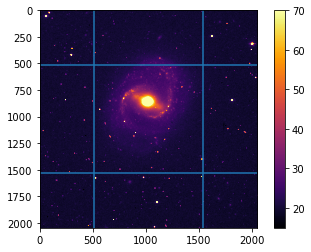

In [9]:
m91_B = fits.open('data_2019/Filtered_Images/M91_B.fits')[0].data
m91_V = fits.open('data_2019/Filtered_Images/M91_V.fits')[0].data
m91_H = fits.open('data_2019/Filtered_Images/M91_H.fits')[0].data
plt.imshow(m91_H,cmap = 'inferno',vmin=15,vmax=70)
plt.axvline(x=quarter)
plt.axvline(x=3*quarter)
plt.axhline(y=quarter)
plt.axhline(y=3*quarter)
#plt.axhline(y=2*quarter)
plt.colorbar();

In [13]:
def majorMinor(major,eccentricity):
    arcsec = major*2*0.304
    majorAxis = arcsec/60 # in arcmins
    minorAxis = majorAxis*(1-eccentricity)
    return (majorAxis,minorAxis)

def ellipseFit(image,sma,eps,pa):
    #splitImage = np.array_split(image,4,axis=1) # splitting into three vertical segments - middle one contains galaxy
    #someImage = np.concatenate((splitImage[1],splitImage[2]),axis=1)
    #galaxy = np.array_split(someImage,3,axis=1)[1] # splitting again and isolating galaxy 
    centerPoint = centroid_1dg(image) # finding the center of the galaxy using a 2D gaussian distrubtion of the data
    guessEllipse = EllipseGeometry(x0=centerPoint[0],y0=centerPoint[1],sma=sma,eps=eps,pa=pa)
    ellipse = Ellipse(image, guessEllipse)
    isolist = ellipse.fit_image()
    best_sma = isolist.sma[-1]
    best_e = isolist.eps[-1]
    gradErrors = isolist.grad_error
    smaList = isolist.sma
    majorAxis, minorAxis = majorMinor(best_sma,best_e)
    
    geometry = EllipseGeometry(x0=centerPoint[0] ,y0=centerPoint[1] , sma=best_sma, eps=best_e, pa=pa)
    aper = EllipticalAperture((geometry.x0,geometry.y0),geometry.sma,geometry.sma*(1-geometry.eps),geometry.pa)
        
    return (majorAxis,minorAxis,smaList,gradErrors,aper)


In [14]:
H_sizes = ellipseFit(m91_H,250,0.55,22*np.pi/180)

In [15]:
H_sizes[0]

3.3718666666666666

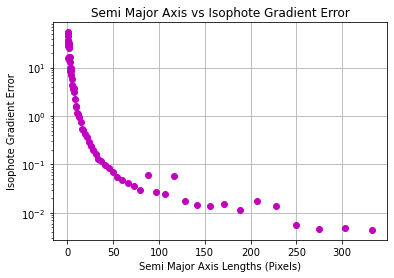

In [16]:
plt.plot(H_sizes[2],H_sizes[3],'mo')
plt.xlabel('Semi Major Axis Lengths (Pixels)')
plt.ylabel('Isophote Gradient Error')
plt.title('Semi Major Axis vs Isophote Gradient Error')
plt.yscale('log')
plt.grid();

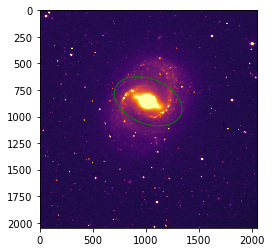

In [18]:
plt.imshow(m91_H,cmap='inferno',vmin=15,vmax=50)
H_sizes[4].plot(color='green')

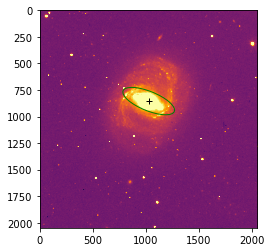

In [19]:
# For B filtered Image
x2,y2 = centroid_1dg(m91_B)
geometry1 = EllipseGeometry(x0=x2 ,y0=y2 , sma=260, eps=0.65, pa=22*np.pi/180)
aper = EllipticalAperture((geometry1.x0,geometry1.y0),geometry1.sma,geometry1.sma*(1-geometry1.eps),geometry1.pa)
marker = '+'
plt.imshow(m91_B,cmap='inferno',vmin=15,vmax=50)
plt.plot(x2,y2,color='black',marker=marker)
aper.plot(color='green');

In [20]:
B_sizes = ellipseFit(m91_B,260,0.55,22*np.pi/180)

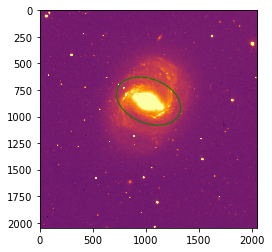

In [21]:
plt.imshow(m91_B,cmap='inferno',vmin=15,vmax=50)
B_sizes[4].plot(color='green')

7.79167151660601

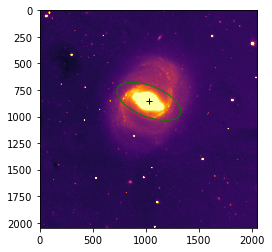

In [226]:
# For V filtered Image
x3,y3 = centroid_1dg(m91_V)
geometry2 = EllipseGeometry(x0=x3 ,y0=y3 , sma=320, eps=0.55, pa=22*np.pi/180)
aper = EllipticalAperture((geometry2.x0,geometry2.y0),geometry2.sma,geometry2.sma*(1-geometry2.eps),geometry2.pa)
marker = '+'
plt.imshow(m91_V,cmap='inferno',vmin=190,vmax=300)
plt.plot(x2,y2,color='black',marker=marker)
aper.plot(color='green');

In [230]:
V_sizes = ellipseFit(m91_V,320,0.55,22*np.pi/180)

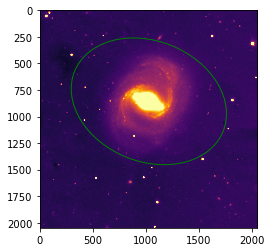

In [231]:
plt.imshow(m91_V,cmap='inferno',vmin=190,vmax=300)
V_sizes[4].plot(color='green')

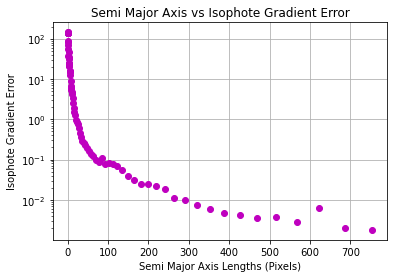

In [232]:
plt.plot(V_sizes[2],V_sizes[3],'mo')
plt.xlabel('Semi Major Axis Lengths (Pixels)')
plt.ylabel('Isophote Gradient Error')
plt.title('Semi Major Axis vs Isophote Gradient Error')
plt.yscale('log')
plt.grid();

In [239]:
np.mean([H_sizes[0],B_sizes[0],V_sizes[0]]) # average semi major axis length

4.735283904227557

In [58]:
# Messing Around

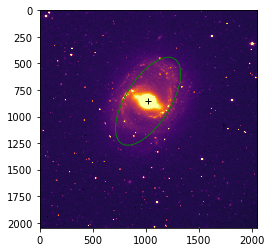

In [138]:
x1,y1 = centroid_1dg(m91_H)
geometry = EllipseGeometry(x0=x1 ,y0=y1 , sma=470, eps=0.55, pa=122*np.pi/180)
aper = EllipticalAperture((geometry.x0,geometry.y0),geometry.sma,geometry.sma*(1-geometry.eps),geometry.pa)
marker = '+'
plt.imshow(m91_H,cmap='inferno',vmin=15,vmax=50)
plt.plot(x1,y1,color='black',marker=marker)
aper.plot(color='green');

In [139]:
from photutils.isophote import Ellipse
ellipse = Ellipse(m91_H,geometry)
isolist = ellipse.fit_image()

In [140]:
table = isolist.to_table()
table

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_err,grad_rerr,x0,x0_err,y0,y0_err,ndata,flag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int64,int64,int64,int64
0.0,1458.8916389738883,0.0,0.0,0.0,0.0,0.0,0.0,None,None,1010.5148121385494,0.0,857.87794216422,0.0,1,0,0,0
0.541024848015001,1457.5439559607428,0.16446829413709566,0.7450117295630628,0.005915190857672276,5.270905916066008,0.3745787556240409,-39.20736641261884,15.551502177400023,0.3966474568512409,1010.5148121385494,0.006256189393636358,857.87794216422,0.0017429547786019103,13,0,50,2
0.5951273328165011,1453.6574360964041,1.4216338930143737,0.4703278405894998,0.07386565783245541,20.647556983276196,6.078978554656858,-60.70086243416694,42.93730686470611,0.7073590908411511,1010.4711985773317,0.03967829267507327,857.714274723017,0.025791306894827663,13,0,17,0
0.6546400660981512,1450.8284026663443,1.9139859091733367,0.3523402413097385,0.08959939156202341,35.91903697224365,9.138098579911173,-74.78497227274357,50.6797243086366,0.6776725693472984,1010.4600341490844,0.040774371387952334,857.6014386536044,0.03616498374348784,13,0,11,0
0.7201040727079663,1441.9376796568833,2.4540437194181632,0.22994727563851716,0.07628856035638729,41.592533520608626,11.09877819917663,-122.24073308614494,52.55650201381409,0.42994262785365256,1010.4757819610641,0.03266544723253223,857.5476656991873,0.03179905057606912,13,0,10,0
0.7921144799787629,1429.3337051145902,2.8574824746189043,0.1629794376934023,0.07492180149539945,41.592533520608626,14.855844062363097,-143.2926961282219,52.45604440009932,0.3660761910234443,1010.4897742030029,0.033416110673894016,857.525836961185,0.03284235834934183,13,0,10,0
0.8713259279766393,1416.002614226481,2.938173519055079,0.1289690416114018,0.0663946254460408,41.49727264597581,16.309536793822108,-157.09830118091412,47.580350962043816,0.30286992669163476,1010.5017311761243,0.031822684092754766,857.5058713950931,0.03141005507856112,13,0,10,0
0.9584585207743033,1399.7381315721605,2.6453015757703655,0.08763156575901772,0.05470634361087233,41.335241537092884,19.330068134060465,-163.5563809273643,39.29506571690124,0.24025394481155862,1010.5295468596622,0.02803594574079644,857.4834099574269,0.02781915404932531,13,0,10,0


<ipython-input-16-2c45e5a1015d>:2: RuntimeWarning: invalid value encountered in true_divide
  yPos = sma/np.sin(pa)


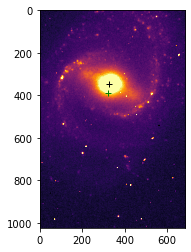

In [16]:
def findVertex(sma,pa):
    yPos = sma/np.sin(pa)
    xPos = sma*np.tan(pa)
    return (xPos,yPos)

angles = isolist.pa
majorAxes = isolist.sma
positions = (x1+findVertex(majorAxes,angles)[0],y1+findVertex(majorAxes,angles)[1])

plt.imshow(a[1],cmap='inferno',vmin=15,vmax=70)
plt.plot(x1,y1,color='black',marker=marker)
plt.plot(positions[0][35],positions[1][35],color='green',marker=marker);

In [84]:

for i in range(len(positions[1])):
    if positions[1][i]>=1000:
        np.delete(positions[1],i)
        np.delete(positions[0],i)

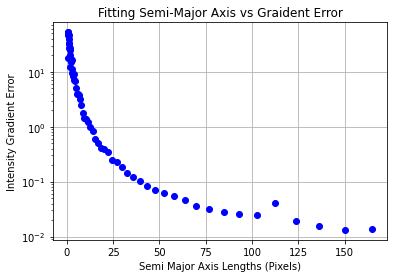

In [85]:
plt.plot(isolist.sma,table['grad_err'],'bo')
plt.xlabel('Semi Major Axis Lengths (Pixels)')
plt.ylabel('Intensity Gradient Error')
plt.yscale('log')
plt.grid()
plt.title('Fitting Semi-Major Axis vs Graident Error');

In [225]:
isolist.intens # this gives the mean intensity level along the isophote path

array([1458.65140157, 1457.10605093, 1453.37496719, 1450.61489656,
       1441.51093414, 1428.89320117, 1415.4360508 , 1399.13585538,
       1382.30518584, 1364.27491394, 1342.21240345, 1318.44782486,
       1291.69216716, 1259.77783789, 1223.00348263, 1182.83158234,
       1137.20850047, 1088.6884847 , 1030.77134211,  969.16340814,
        903.92635222,  841.24107857,  777.74463239,  715.35991588,
        652.84919675,  595.30633454,  546.21174942,  498.51577002,
        457.25833357,  424.55749702,  386.23875333,  354.89674452,
        329.47081789,  300.24630726,  273.31237967,  242.64410475,
        221.42073916,  203.15523408,  183.6750441 ,  168.54809608,
        154.43905865,  139.80474891,  124.12775326,  110.39445317,
        101.54654157,   94.11391725,   86.74270454,   81.81981421,
         75.99959022,   70.55072401,   64.84531408,   59.56534999,
         56.60144112,   52.21052073,   50.04280457,   46.43866338,
         44.84410121,   43.34914378,   42.30282318,   40.58934

In [294]:
isolist.grad

# This table shows the average intensity gradient of the isophotes fitted to the galaxy. 
# If we think about it, the slope would be near to zero for conintuous isophotes as that 
# would represent the most consistent connection of intensities. Hence the right ellipse would have gradient 
# to zero

array([ 0.00000000e+00, -4.25139802e+01, -7.10402257e+01, -7.57400425e+01,
       -1.24304465e+02, -1.43372768e+02, -1.57435912e+02, -1.63922288e+02,
       -1.68862085e+02, -1.70993104e+02, -1.73505108e+02, -1.98046587e+02,
       -2.10352227e+02, -2.06978297e+02, -2.13821073e+02, -2.23322662e+02,
       -2.18857574e+02, -2.21617808e+02, -2.18381850e+02, -2.10574971e+02,
       -2.02480413e+02, -1.85932950e+02, -1.69000087e+02, -1.55599801e+02,
       -1.27138459e+02, -1.06601751e+02, -8.94108248e+01, -6.82449011e+01,
       -5.46892879e+01, -5.04964706e+01, -3.83121160e+01, -3.02430549e+01,
       -2.94736013e+01, -2.28291833e+01, -2.32494485e+01, -1.46962645e+01,
       -1.19079306e+01, -1.04406525e+01, -7.87634380e+00, -7.26733556e+00,
       -7.23118073e+00, -5.47856343e+00, -4.45542432e+00, -3.45798685e+00,
       -2.61311880e+00, -2.13394775e+00, -1.47286096e+00, -1.31164684e+00,
       -1.30243755e+00, -1.07934003e+00, -9.41574359e-01, -6.25129580e-01,
       -6.54309508e-01, -